# Speichern und Laden von Oberflächen
In diesem Notebook werden wir eine Oberfläche auf der Festplatte speichern und von dort wieder laden, unter Verwendung von [vedo](https://vedo.embl.es/).

Siehe auch
* https://vedo.embl.es/docs/vedo/io.html#write
* https://vedo.embl.es/docs/vedo/io.html#load

In [1]:
import napari_process_points_and_surfaces as nppas
import vedo

from branchoid import branchoid

Ausgangspunkt ist wieder die Oberfläche des simulierten Branchoids.

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
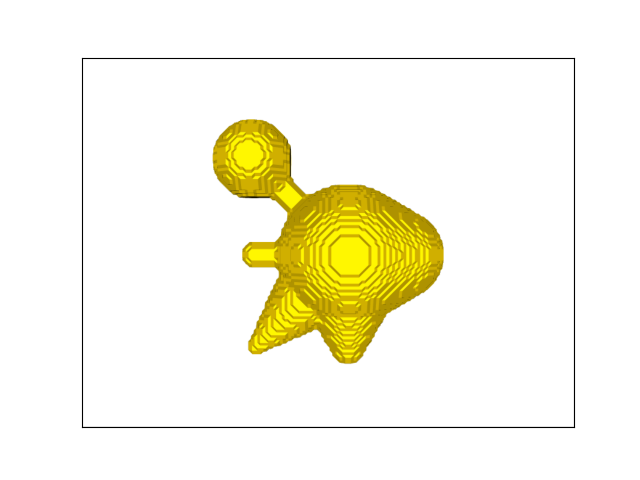

In [2]:
binary_image = branchoid()
surface = nppas.all_labels_to_surface(binary_image)
surface

## Speichern von Oberflächen auf der Festplatte
Die [vedo](https://vedo.embl.es/) Bibliothek stellt Funktionen zum Speichern und Laden von Oberflächennetzen bereit. Um sie von/zu napari-kompatiblen Oberflächen-Tupeln zu konvertieren, verwenden wir [napari-process-points-and-surfaces (nppas)](https://github.com/haesleinhuepf/napari-process-points-and-surfaces).

In [3]:
mesh = nppas.to_vedo_mesh(surface)

filename = "../../data/branchoid.ply"

_ = vedo.write(mesh, filename)

## Laden von Netzen von der Festplatte

<Mesh(0x000001E7DB0C8370) at 0x000001E7F7F8FD60>
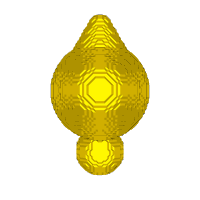

In [4]:
new_mesh = vedo.load(filename)
new_mesh

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
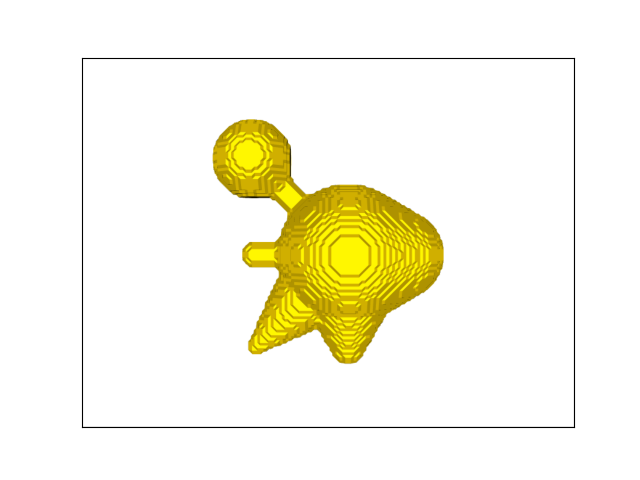

In [5]:
new_surface = nppas.to_napari_surface_data(new_mesh)
new_surface